C:\Users\elpid\AppData\Local\Temp\ipykernel_36756\1505176867.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Dataset shape: (1470, 35)
First few rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  Relations

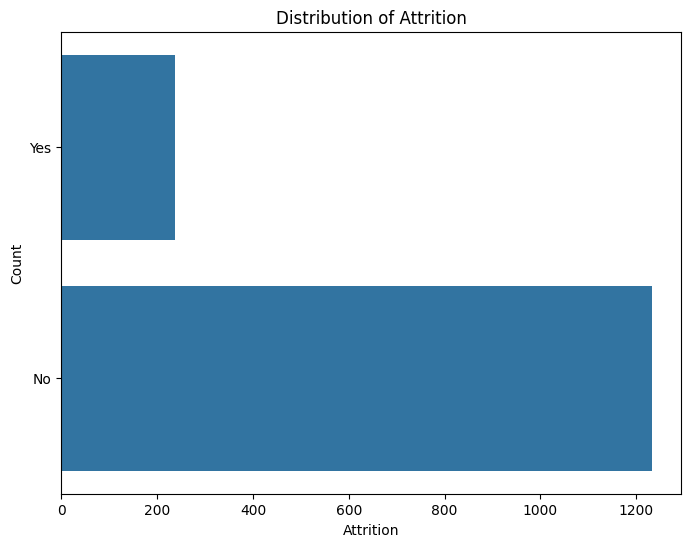

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv('hranalytics\WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the shape and first few rows of the dataset
print(f'Dataset shape: {data.shape}')
print('First few rows of the dataset:')
print(data.head())

# Display dataset information and summary statistics
print("Dataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Visualize the distribution of the target variable 'Attrition'
plt.figure(figsize=(8, 6))
sns.countplot(data['Attrition'])
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# Convert 'Attrition' column to numeric (1 for 'Yes', 0 for 'No')
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)




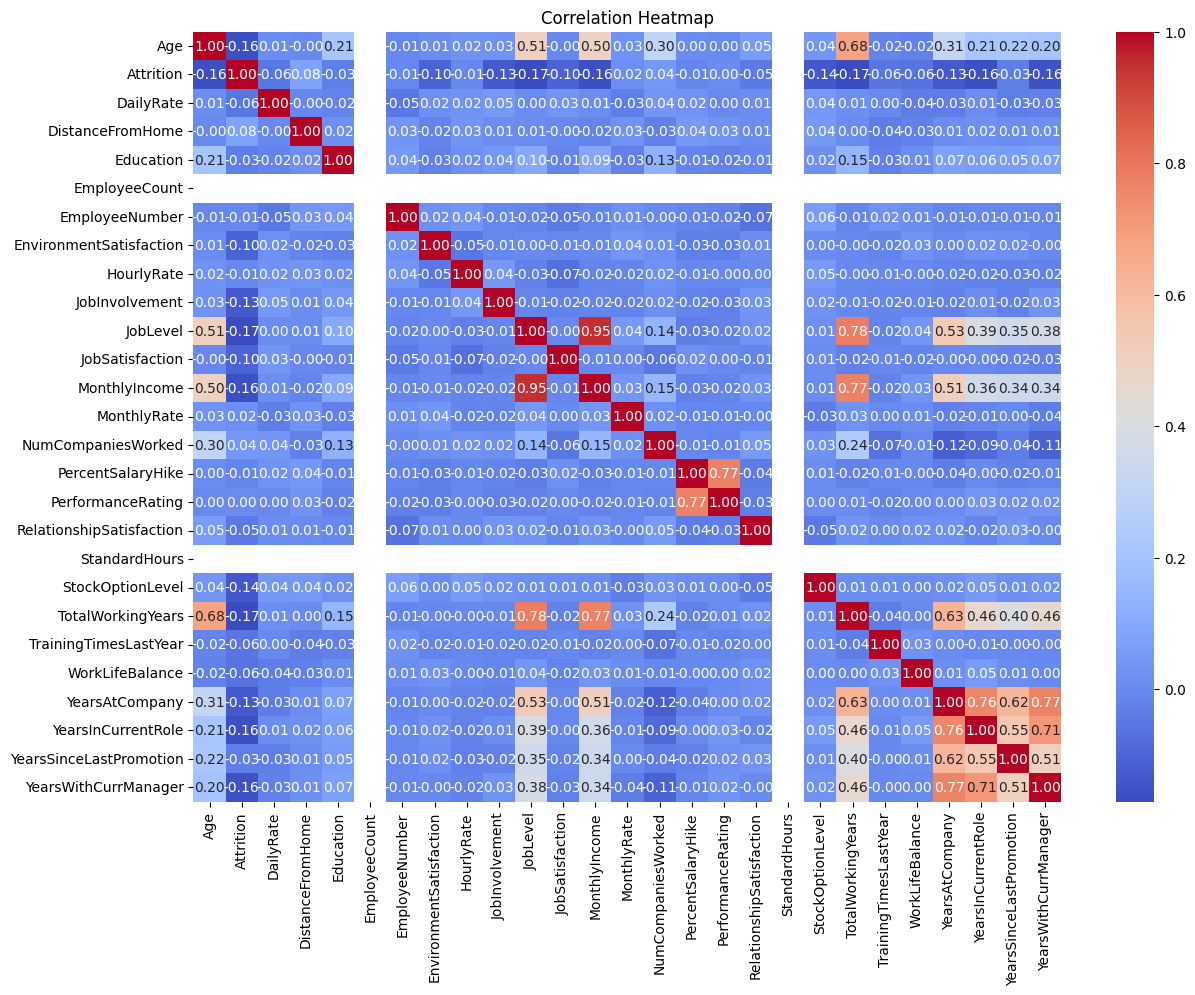

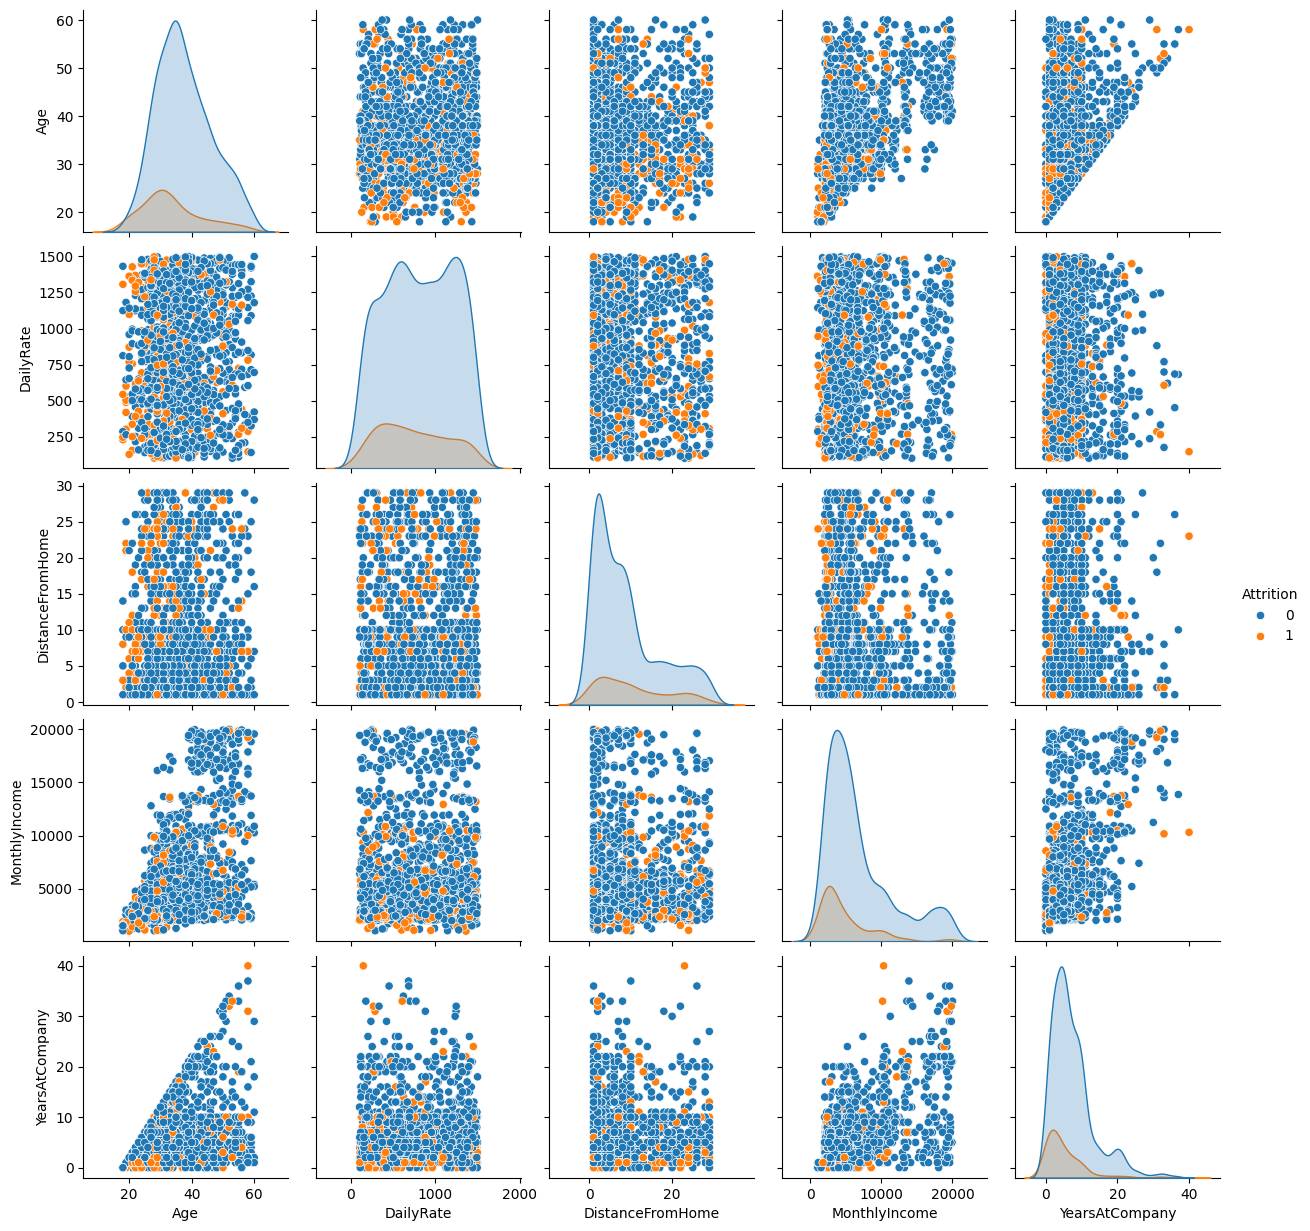

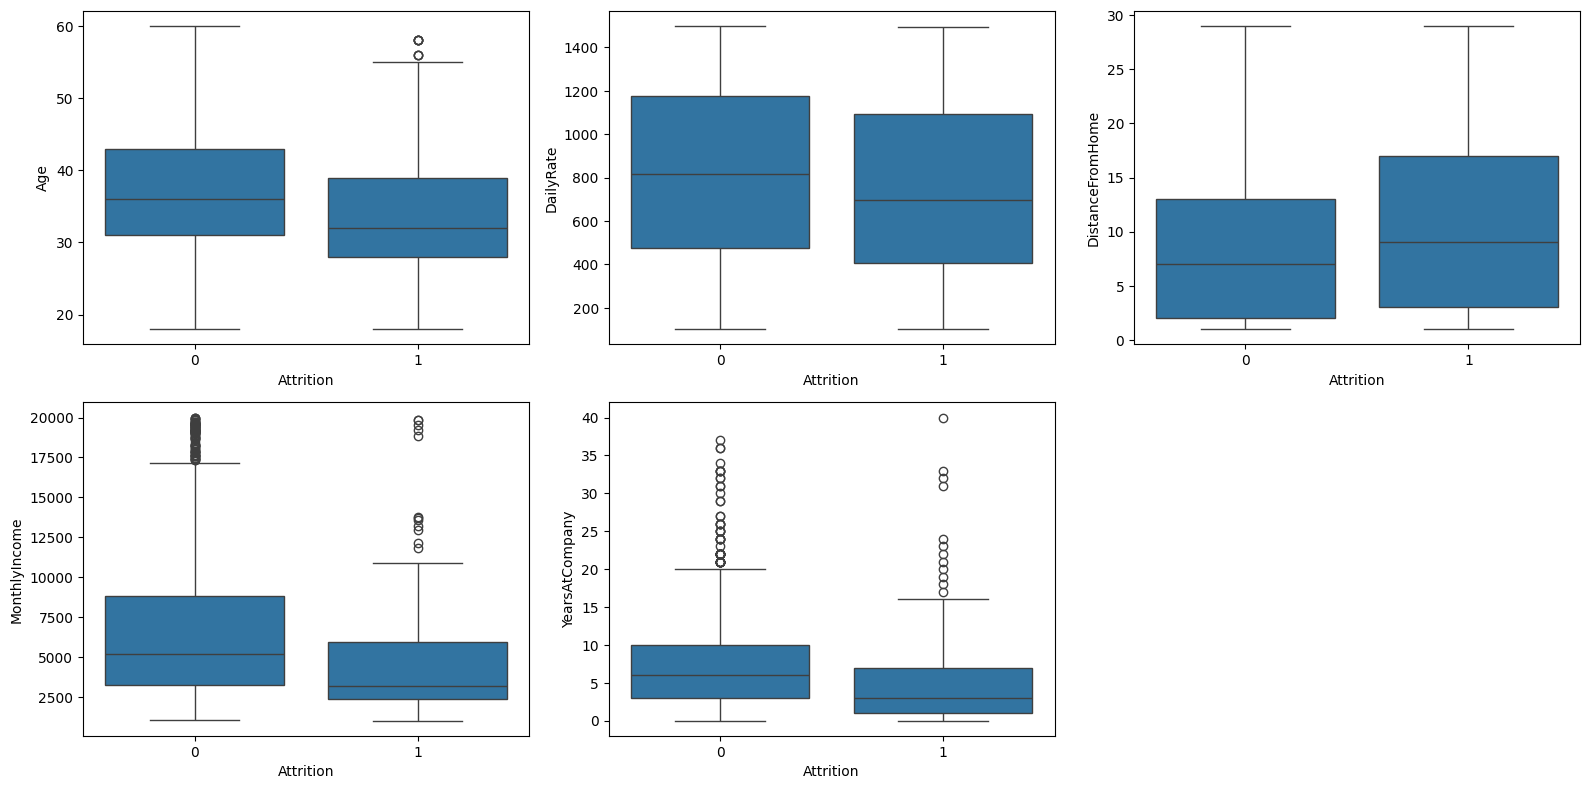

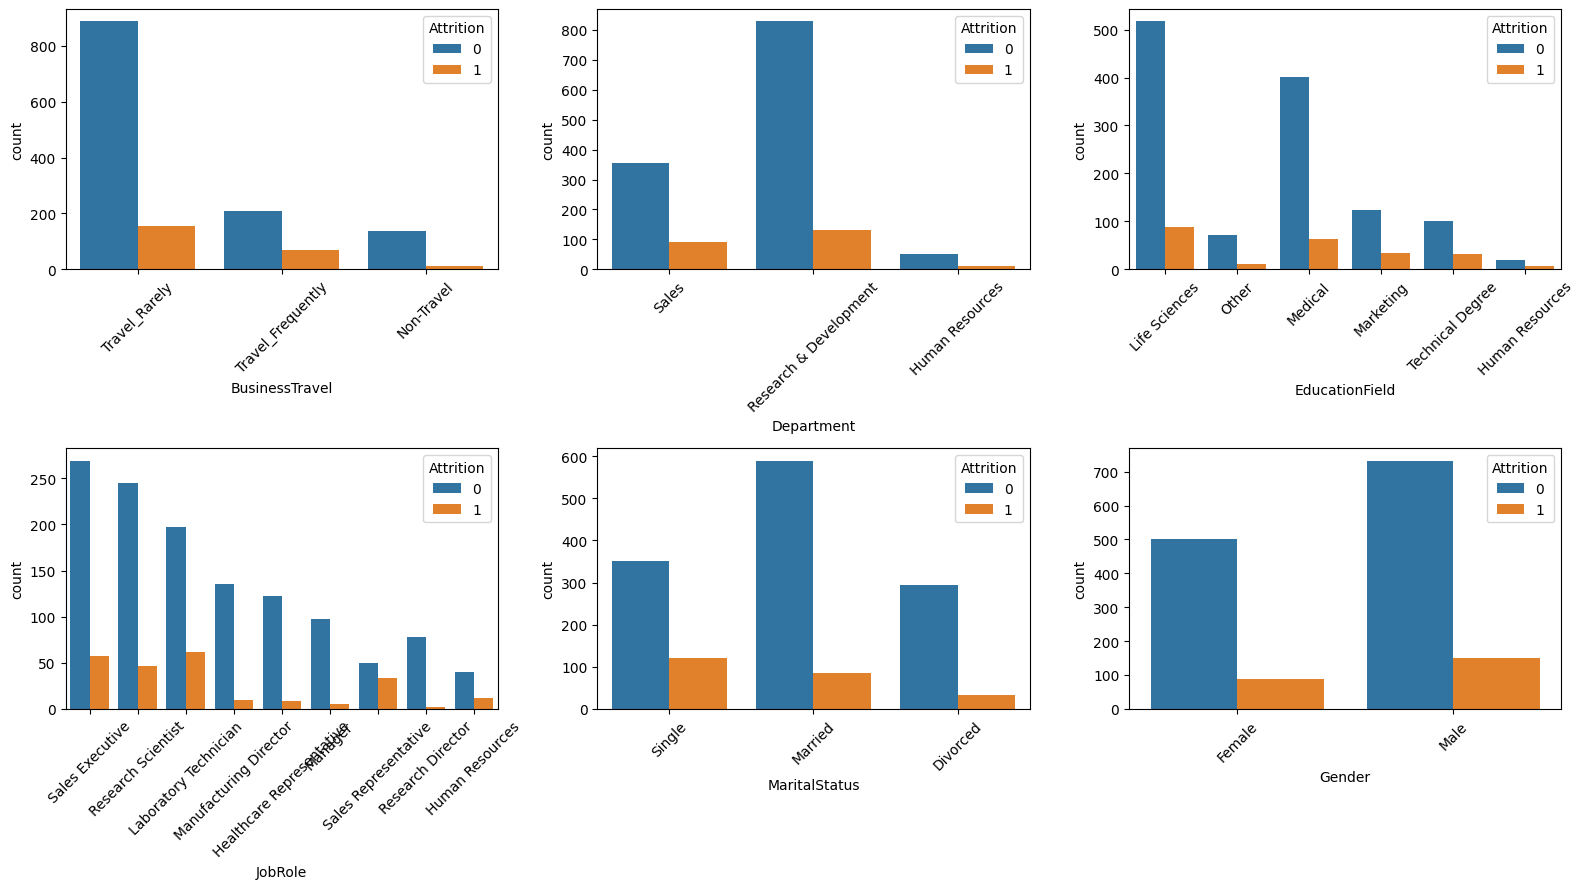

In [2]:
# Visualize correlations between numerical variables
numeric_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14, 10))
sns.heatmap(data_encoded[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected numerical variables
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
sns.pairplot(data[numerical_cols + ['Attrition']], hue='Attrition', diag_kind='kde')
plt.show()

# Boxplot for numerical variables by Attrition status
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Attrition', y=col, data=data)
plt.tight_layout()
plt.show()

# Bar plot for categorical variables
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender']
plt.figure(figsize=(16, 9))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Attrition', data=data)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [3]:
# Split the data into training and testing sets
X = data.drop(['Attrition'], axis=1)  # Features
y = data['Attrition']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and preprocess categorical and numerical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [4]:
# Create a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Train the model using cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'Mean Accuracy: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}')

# Fit and transform X_train
X_train_scaled = pipeline.named_steps['preprocessor'].fit_transform(X_train)
# Transform X_test
X_test_scaled = pipeline.named_steps['preprocessor'].transform(X_test)



Mean Accuracy: 0.8699, Std: 0.0289


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.58      0.38      0.46        39

    accuracy                           0.88       294
   macro avg       0.74      0.67      0.70       294
weighted avg       0.87      0.88      0.87       294

--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.63      0.49      0.55        39

    accurac

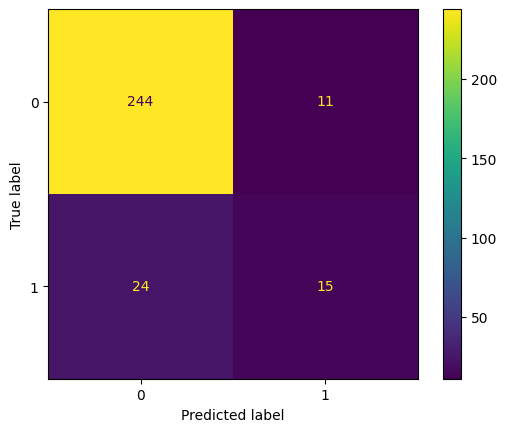

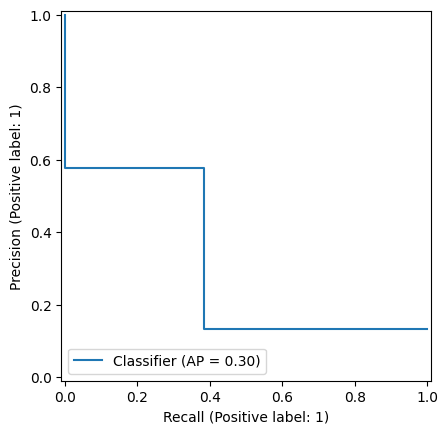

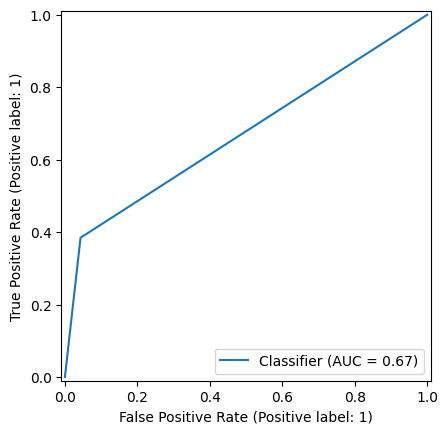

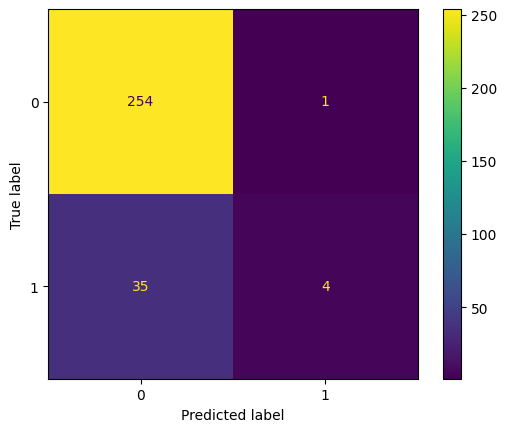

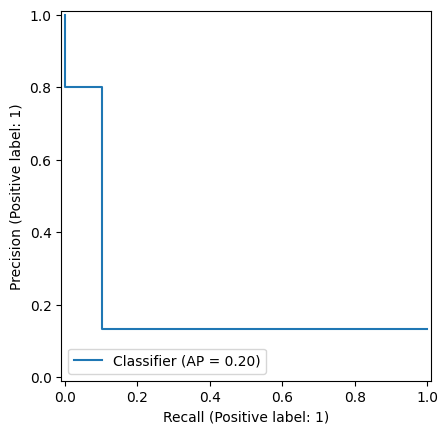

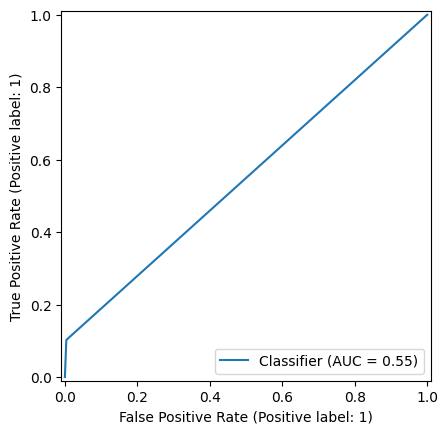

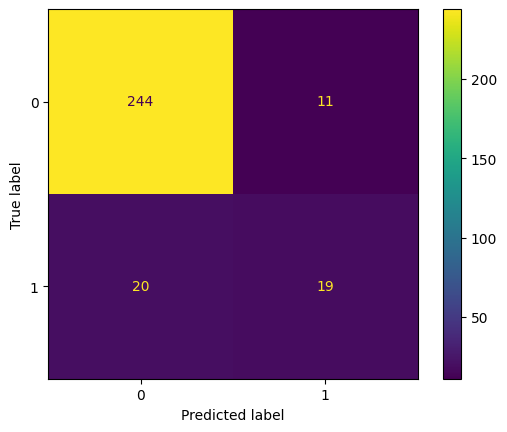

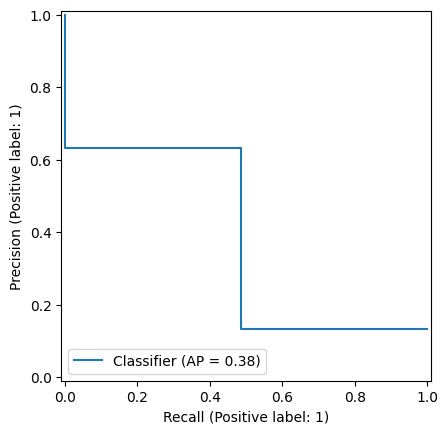

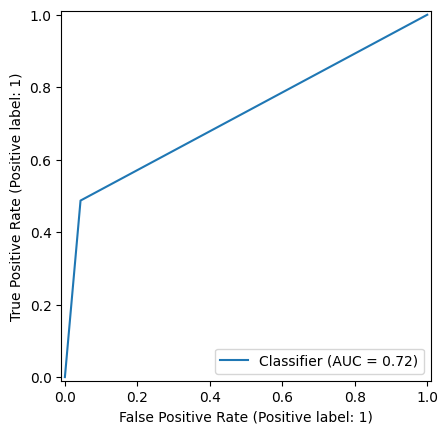

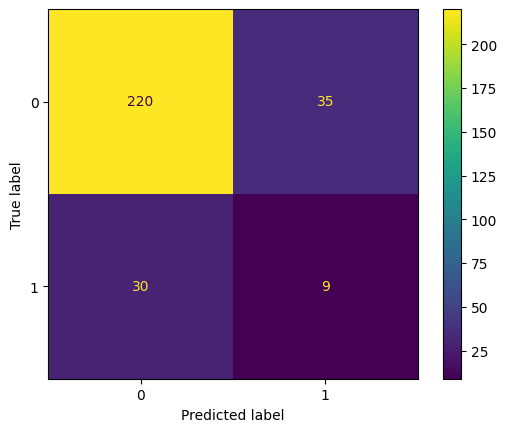

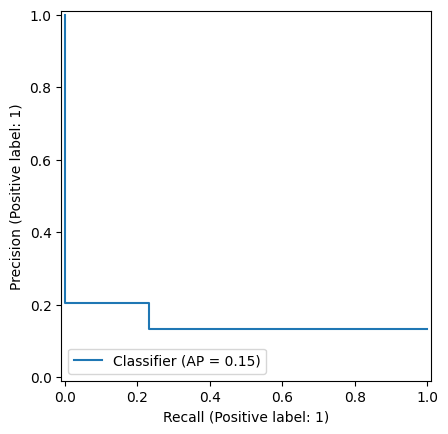

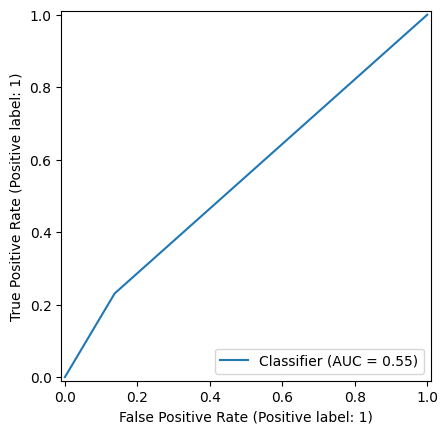

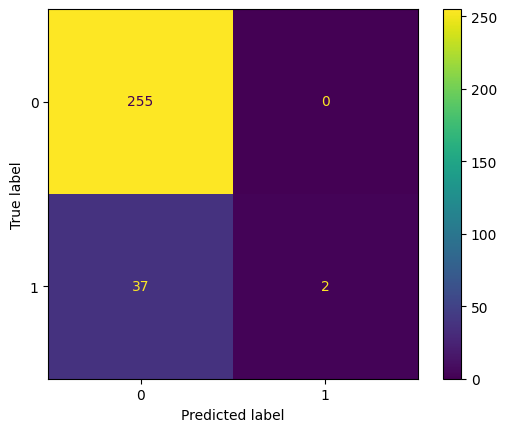

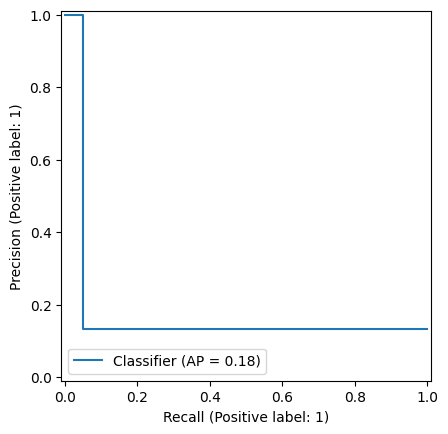

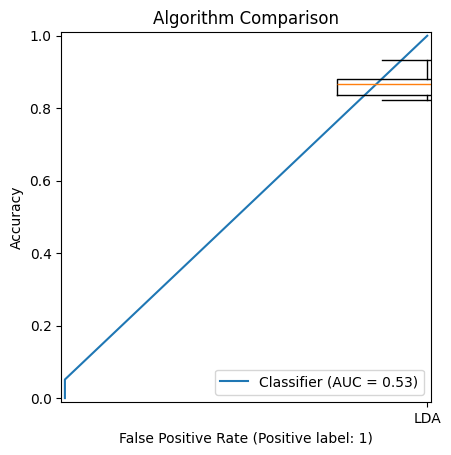

In [5]:
# Function to train and evaluate models
models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

def train_and_evaluate_model(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    PrecisionRecallDisplay.from_predictions(y_test, y_pred)
    RocCurveDisplay.from_predictions(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred, average='macro')
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    models.append(model)
    gc.collect()

# Train and evaluate multiple models
train_and_evaluate_model(LinearDiscriminantAnalysis())
train_and_evaluate_model(RandomForestClassifier())
train_and_evaluate_model(LogisticRegression(solver='liblinear', random_state=42))
train_and_evaluate_model(DecisionTreeClassifier(random_state=42))
train_and_evaluate_model(SVC(gamma='auto', random_state=42))

# Initialize models for comparison
model_comparison = [
    ('LDA', LinearDiscriminantAnalysis()),
    ('RF', RandomForestClassifier(random_state=42)),
    ('LR', LogisticRegression(solver='liblinear', random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(gamma='auto', random_state=42))
]

# Compare models using cross-validation
results = []
names = []
for name, model in model_comparison:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name} Mean Accuracy: {cv_results.mean():.4f}, Std: {cv_results.std():.4f}')

# Plotting boxplot for model comparison
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

In [6]:
# Creating the DataFrame
evaluation_data = {
    "APPROACH": [
        "LINEAR DISCRIMINANT ANALYSIS",
        "RANDOM FOREST",
        "LOGISTIC REGRESSION",
        "DECISION TREE",
        "SVM"
    ],
    "PRECISION": precision_scores,
    "RECALL": recall_scores,
    "F1-SCORE": f1_scores,
    "ACCURACY": accuracy_scores
}

evaluation_df = pd.DataFrame(evaluation_data)

# Display the DataFrame
print(evaluation_df)


                       APPROACH  PRECISION    RECALL  F1-SCORE  ACCURACY
0  LINEAR DISCRIMINANT ANALYSIS   0.743685  0.670739  0.697308  0.880952
1                 RANDOM FOREST   0.839446  0.549321  0.557821  0.877551
2           LOGISTIC REGRESSION   0.778788  0.722021  0.745497  0.894558
3                 DECISION TREE   0.542273  0.546757  0.544077  0.778912
4                           SVM   0.936644  0.525641  0.514960  0.874150


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear'],  # Focusing on solver that is less likely to cause convergence issues
    'penalty': ['l1', 'l2']
}

# Create a Logistic Regression classifier with increased max_iter
lr_classifier = LogisticRegression(random_state=42, max_iter=10000)  # Increase max_iter

# Create a GridSearchCV object with the logistic regression classifier and the parameter grid
grid_search = GridSearchCV(lr_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_lr_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on test set: 0.9013605442176871


Epoch 1/20


C:\Users\elpid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7938 - loss: 0.5158 - val_accuracy: 0.8673 - val_loss: 0.3617
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8327 - loss: 0.3880 - val_accuracy: 0.8673 - val_loss: 0.3430
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8417 - loss: 0.3543 - val_accuracy: 0.8707 - val_loss: 0.3201
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8425 - loss: 0.3372 - val_accuracy: 0.8844 - val_loss: 0.3136
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8800 - loss: 0.2959 - val_accuracy: 0.8741 - val_loss: 0.3144
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8902 - loss: 0.2717 - val_accuracy: 0.8810 - val_loss: 0.3136
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9067 - loss: 0.2474 - val_accuracy: 0.8810 - val_loss: 0.3159
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9008 - loss: 0.2468 - val_accuracy: 0.8707 - val_loss: 0.3219
Ep

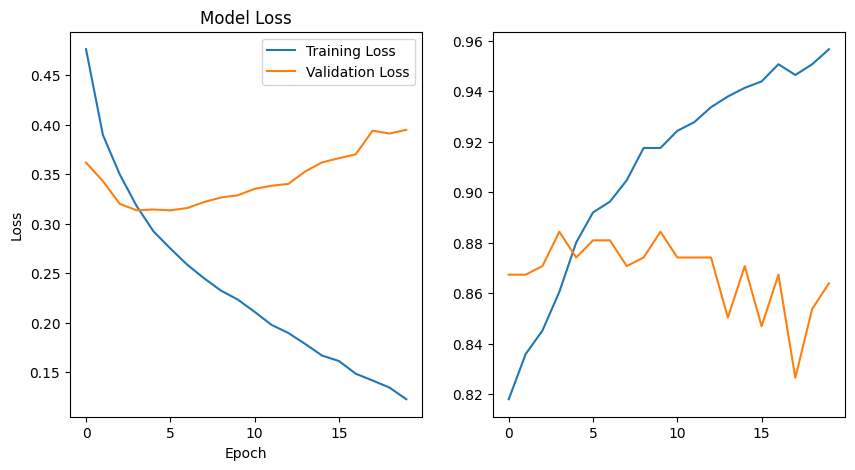

In [8]:
# Define and train a neural network model
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

# Evaluate the neural network model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Accuracy on test set: {accuracy}')

# Plot training & validation loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])